In [2]:
import pandas as pd
import scipy.io as sio
import numpy as np
from matplotlib import pyplot as plt
import seaborn
from IPython.core.display import display
import glob
%matplotlib inline

In [3]:
df = pd.read_pickle('../testData/scrobbles_processed/5759068.pkl') # ME!
Y3 = np.loadtxt('/Users/jaredlorince/git/lib/bhtsne/output_normed',delimiter='\t')

In [15]:
artist_seq = df[['block','artist_idx']].groupby('block').first()
artist_seq['prev'] = artist_seq['artist_idx'].shift(1)
result = {}
for row in artist_seq.itertuples():
    print row[1],row[2]
    break

50.0 nan


In [41]:
def srter(row):
    a,b = row['prev'],row['artist_idx'],
    if b<a:
        a = row['artist_idx']
        b = row['prev']
    return pd.Series({'a':a,'b':b})
df['prev'] = df['artist_idx'].shift(1)
df = pd.concat([df,df.apply(srter,axis=1)],axis=1)          
jumps = df.groupby(['a','b']).count()['block'].reset_index()
coords = pd.DataFrame(Y3).reindex(range(112312))
jumps = jumps.join(coords,on='a').join(coords,on='b',rsuffix='_prev')
jumps[jumps['a']!=jumps['b']]['block'].describe()


count    15328.000000
mean         1.513961
std          1.643726
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         41.000000
Name: block, dtype: float64

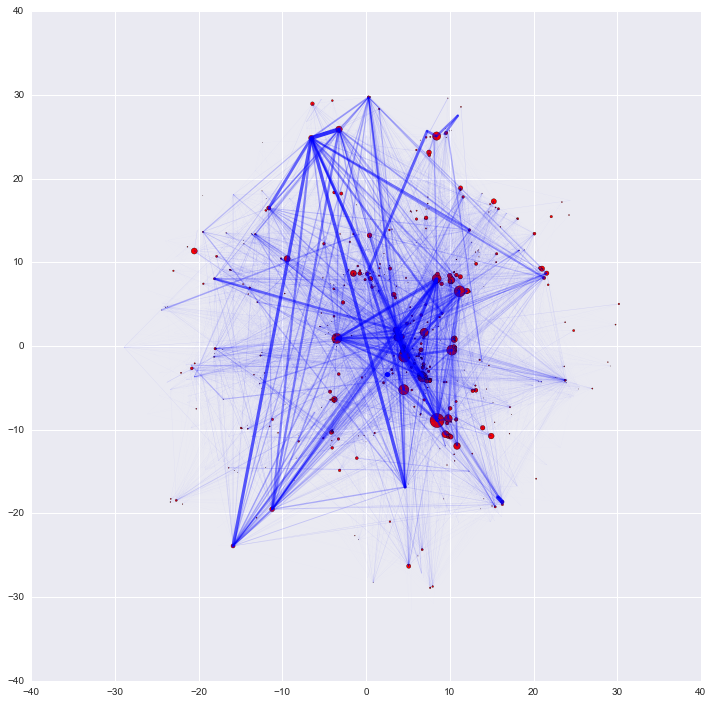

In [42]:
fig,ax = plt.subplots(1,1,figsize=(12,12))
mx = jumps[jumps['a']!=jumps['b']]['block'].max()
for row in jumps.dropna().sort_values(by='block').iterrows():
    row = row[1]
    ax.plot([row['0_prev'],row['0']],[row['1_prev'],row['1']],c='blue',alpha=row['block']/float(mx),lw=5*(row['block']/float(mx)))
self_jumps = jumps[jumps['a']==jumps['b']]
self_jump_mx = self_jumps['block'].max()
ax.scatter(x=self_jumps['0'],y=self_jumps['1'],s=200*(self_jumps['block']/self_jump_mx),c='red')

# ax.set_xlim(-150,150);
# ax.set_ylim(-150,150);
#fig.savefig('/Users/jaredlorince/Desktop/test.pdf')

In [2]:
def srter(row):
    a,b = row['prev'],row['artist_idx'],
    if b<a:
        a = row['artist_idx']
        b = row['prev']
    return pd.Series({'a':a,'b':b})

for f in glob.glob('../testData/scrobbles_processed/*.pkl')[:5]:
    df = pd.read_pickle(f) 

    df['prev'] = df['artist_idx'].shift(1)
    df = pd.concat([df,df.apply(srter,axis=1)],axis=1)          
    jumps = df.groupby(['a','b']).count()['block'].reset_index()
    coords = pd.DataFrame(Y3).reindex(range(112312))
    jumps = jumps.join(coords,on='a').join(coords,on='b',rsuffix='_prev')
    jumps[jumps['a']!=jumps['b']]['block'].describe()
    
    fig,ax = plt.subplots(1,1,figsize=(12,12))
    mx = jumps[jumps['a']!=jumps['b']]['block'].max()
    for row in jumps.dropna().sort_values(by='block').iterrows():
        row = row[1]
        ax.plot([row['0_prev'],row['0']],[row['1_prev'],row['1']],c='blue',alpha=row['block']/float(mx),lw=5*(row['block']/float(mx)))
    self_jumps = jumps[jumps['a']==jumps['b']]
    self_jump_mx = self_jumps['block'].max()
    ax.scatter(x=self_jumps['0'],y=self_jumps['1'],s=200*(self_jumps['block']/self_jump_mx),c='red')
    #ax.grid()
    ax.set_xlim(-35,35)
    ax.set_ylim(-35,35)


NameError: name 'Y3' is not defined